# EDA

In [6]:
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.gofplots import qqplot
from pylab import rcParams
import os
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from pandas.plotting import autocorrelation_plot

from scipy.stats import boxcox

In [7]:

# yf.pdr_override()

# ticker = 'VIX'
# start = '2010-01-01'
# end = '2020-12-31'
# df = web.get_data_yahoo(ticker, start, end)
# df = df['CLOSE']
# print(df.head())
# Get the current working directory
cwd = os.getcwd()

# Get the parent directory of the current working directory
parent = os.path.dirname(cwd)

# Join the parent directory with the Figures folder
path = os.path.join(parent, 'Figures')

First look at the data.

Add these in now mand resave `df5.csv`

In [8]:
df = pd.read_csv(r"C:\Users\micha\Documents\Springboard\Capstone-3\Data\df5.csv", index_col=0)
df['Pos_minus_Neg'] = df.Positive - df.Negative
df['Pos_minus_Neg_pct'] = df.Pos_minus_Neg / df.Total
df['Neg_pct'] = df.Negative / df.Total
df.head()
df.head()

,CLOSE,Positive,Negative,Neutral,Total,summed_vader,sentiments,headlines,stocks,date,dayOfWeek,ave_vader,daily_sentiment,compound,overall_sentiment,Pos_minus_Neg,Pos_minus_Neg_pct,Neg_pct
133,20.04,52,17,96,165,13.7954,"['Positive', ' Neutral', ' Neutral', ' Positiv...","Gold Gains Traction (GLD, GDX, IAG, NEM, ABX),...","['ABX', ' ACTG', ' AEIS', ' AEO', ' AEO', ' AF...",2010-01-04,Monday,0.083608,Positive,0.9982,Positive,35,0.212121,0.103030
134,19.35,84,15,103,202,34.1086,"['Neutral', ' Negative', ' Neutral', ' Positiv...",Advance Auto Parts – A Turnaround Candidate (A...,"['AAP', ' ACE', ' ACN', ' ACN', ' ADBE', ' AEO...",2010-01-05,Tuesday,0.168854,Positive,0.9997,Positive,69,0.341584,0.074257
135,19.16,74,8,86,168,23.6630,"['Neutral', ' Neutral', ' Positive', ' Positiv...","Insurance Sector Overview - 2010 (AGII, SBX, A...","['ACE', ' AEIS', ' AGQ', ' AKS', ' ALL', ' ARE...",2010-01-06,Wednesday,0.140851,Positive,0.9993,Positive,66,0.392857,0.047619
136,19.06,90,29,106,225,24.1130,"['Positive', ' Negative', ' Neutral', ' Negati...","Benzinga’s Top Downgrades (WEN, CMP, ACL, PPDI...","['ABC', ' ACN', ' AEO', ' AEO', ' AER', ' AET'...",2010-01-07,Thursday,0.107169,Positive,0.9986,Positive,61,0.271111,0.128889
137,18.13,80,26,111,217,16.3447,"['Negative', ' Neutral', ' Positive', ' Negati...",Gold Finishes Lower After Pressure from the Do...,"['ABX', ' AEO', ' AGU', ' AGU', ' AIB', ' AKS'...",2010-01-08,Friday,0.075321,Positive,0.9984,Positive,54,0.248848,0.119816


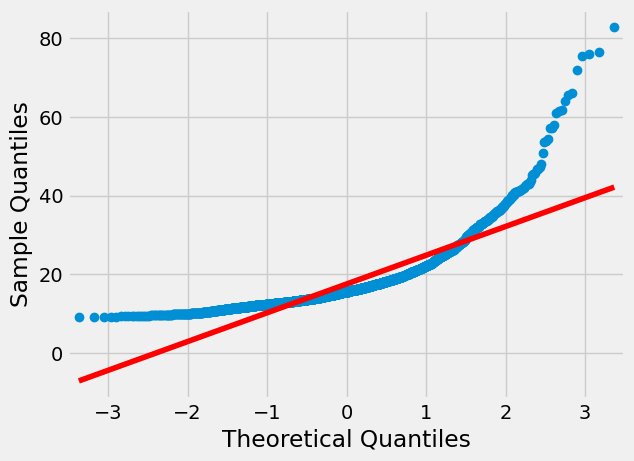

In [9]:
#See if it is normally distributed 
qqplot(df['CLOSE'], line='s')
plt.show()

Make a line plot and histogram for the `CLOSE`

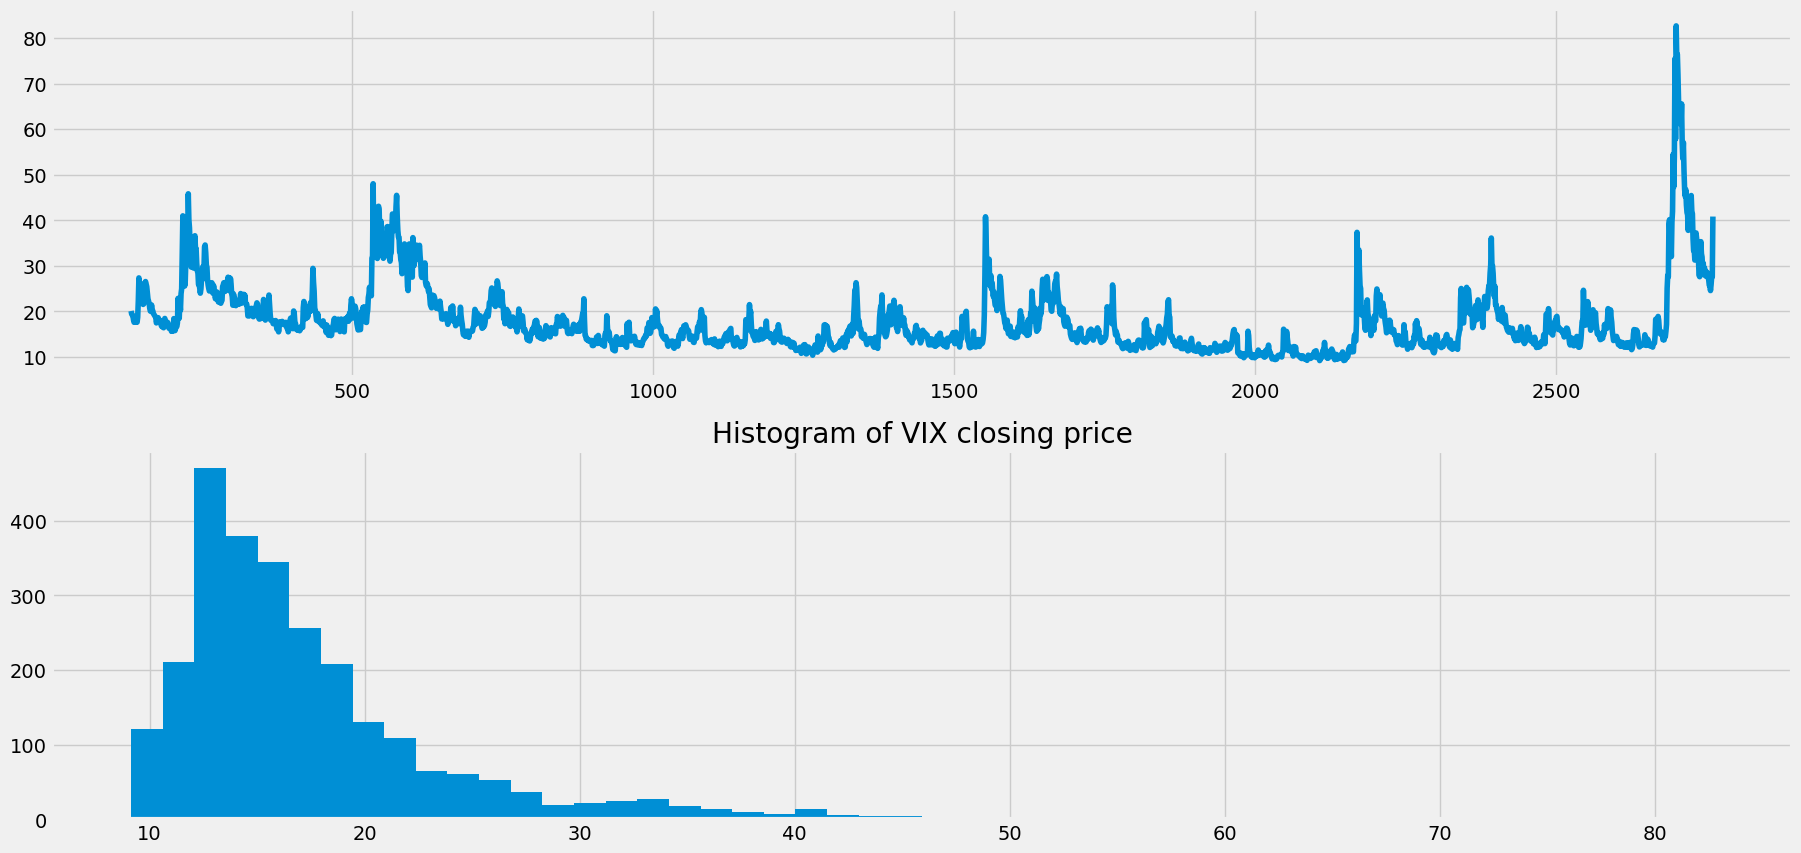

In [11]:
plt.figure(figsize = (20,10))
# line plot 
plt.subplot(211) 
plt.plot(df['CLOSE']) 
# histogram 
plt.subplot(212) 
plt.hist(df['CLOSE'], bins=50)
plt.title("Histogram of VIX closing price")
plt.savefig(os.path.join(path, 'fig4.jpg'))
plt.show()

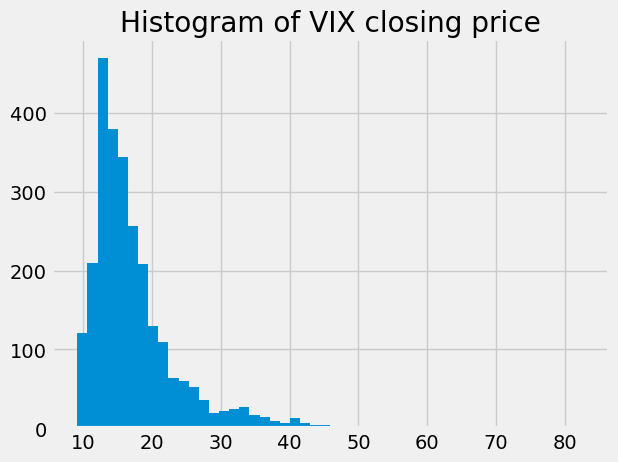

In [12]:
plt.hist(df['CLOSE'], bins=50)
plt.title("Histogram of VIX closing price")
plt.savefig(os.path.join(path, 'fig4.jpg'))
plt.show()

In [159]:
values = pd.DataFrame(df['CLOSE'].values)
values.head()

,0
0,20.04
1,19.35
2,19.16
3,19.06
4,18.13


Set up the values and make scatterplots for the first 9 lags

In [160]:
lags = 9
columns = [values] 
for i in range(1,(lags + 1)):
    columns.append(values.shift(i)) 
dataframe = pd.concat(columns, axis=1) 
columns = ['t']

In [161]:
columns

['t']

In [162]:

for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))

In [163]:
dataframe.columns = columns

Create a dataframe with the `CLOSE` values and lags from 0 to 9

In [164]:
dataframe

,t,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9
0,20.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19.35,20.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19.16,19.35,20.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19.06,19.16,19.35,20.04,NaN,NaN,NaN,NaN,NaN,NaN
4,18.13,19.06,19.16,19.35,20.04,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2623,24.52,25.81,25.66,26.84,28.23,27.51,28.59,27.62,28.01,28.16
2624,25.81,24.52,25.81,25.66,26.84,28.23,27.51,28.59,27.62,28.01
2625,27.57,25.81,24.52,25.81,25.66,26.84,28.23,27.51,28.59,27.62
2626,27.57,27.57,25.81,24.52,25.81,25.66,26.84,28.23,27.51,28.59


Make scatterplots for t vs the lags. Notice the level of correlation(as seen in the tight linear structure) drops off as the value(VIX close) increased and as the number of lags increases.

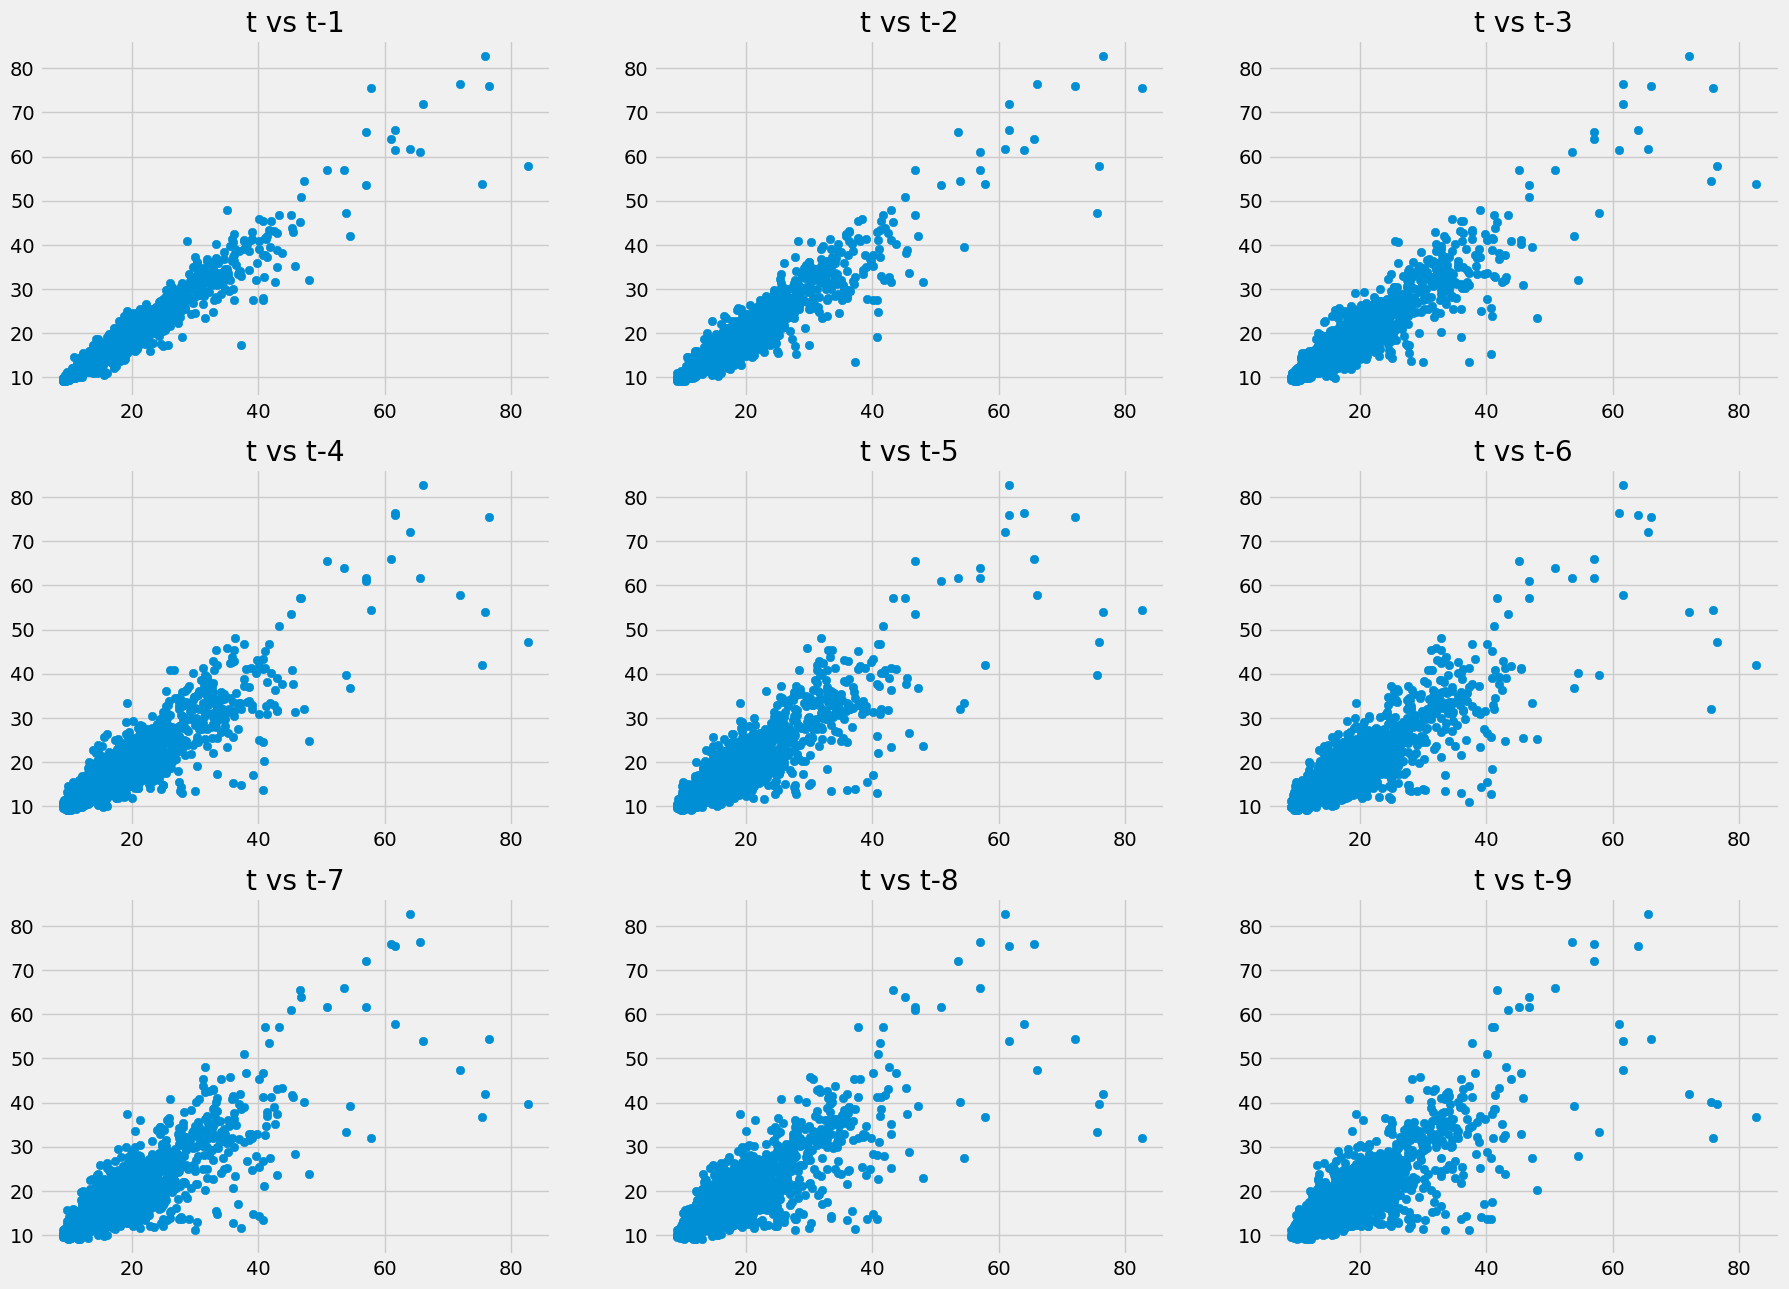

In [165]:
plt.figure(figsize = (20,15))

for i in range(1,(lags + 1)):
    ax = plt.subplot(330 + i)
    ax.set_title('t vs t-' + str(i)) 
    plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)

plt.show();

The autocorrelation plot below shows this quick drop in correlation and although there are occasional spikes in the curve these are most likely to be when the lag happens to be the distance between two spikes in the index.

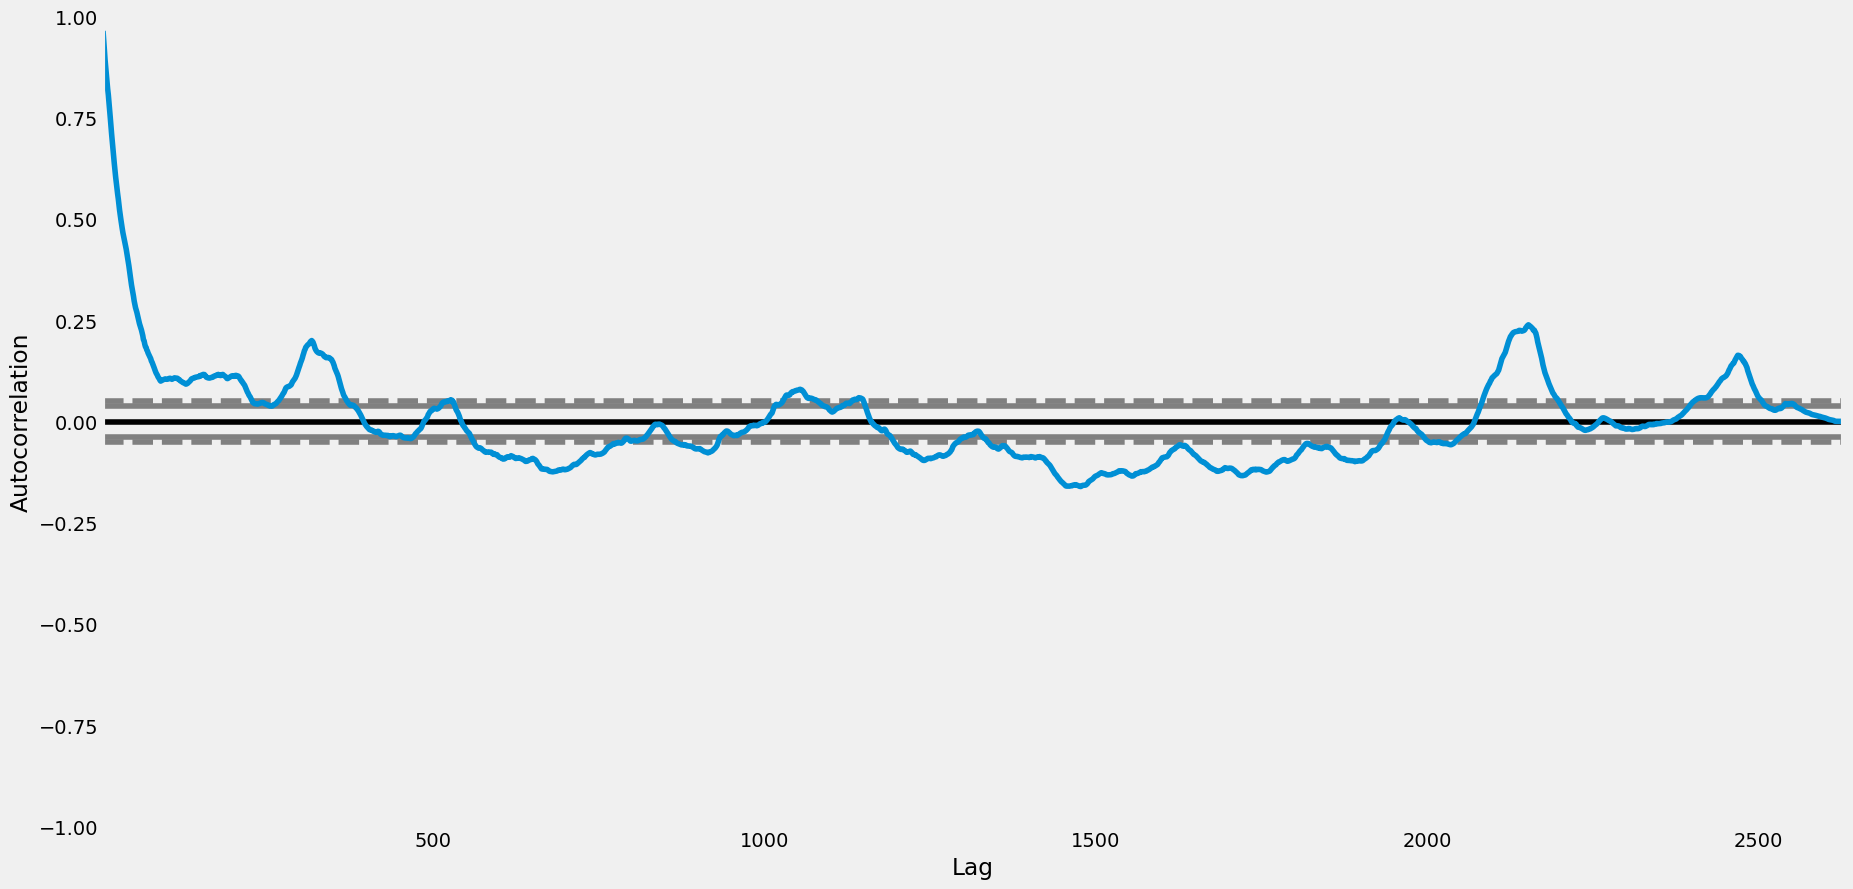

In [166]:
plt.figure(figsize = (20,10))
autocorrelation_plot(df['CLOSE']) 
plt.show()

Below are similar line plots and histograms for square root, log and Box-Cox transformations

**Square Root**

In [167]:
dataframe = pd.DataFrame(df['CLOSE'].values) 
dataframe.columns = ['CLOSE'] 
dataframe['CLOSE'] = np.sqrt(dataframe['CLOSE']) 

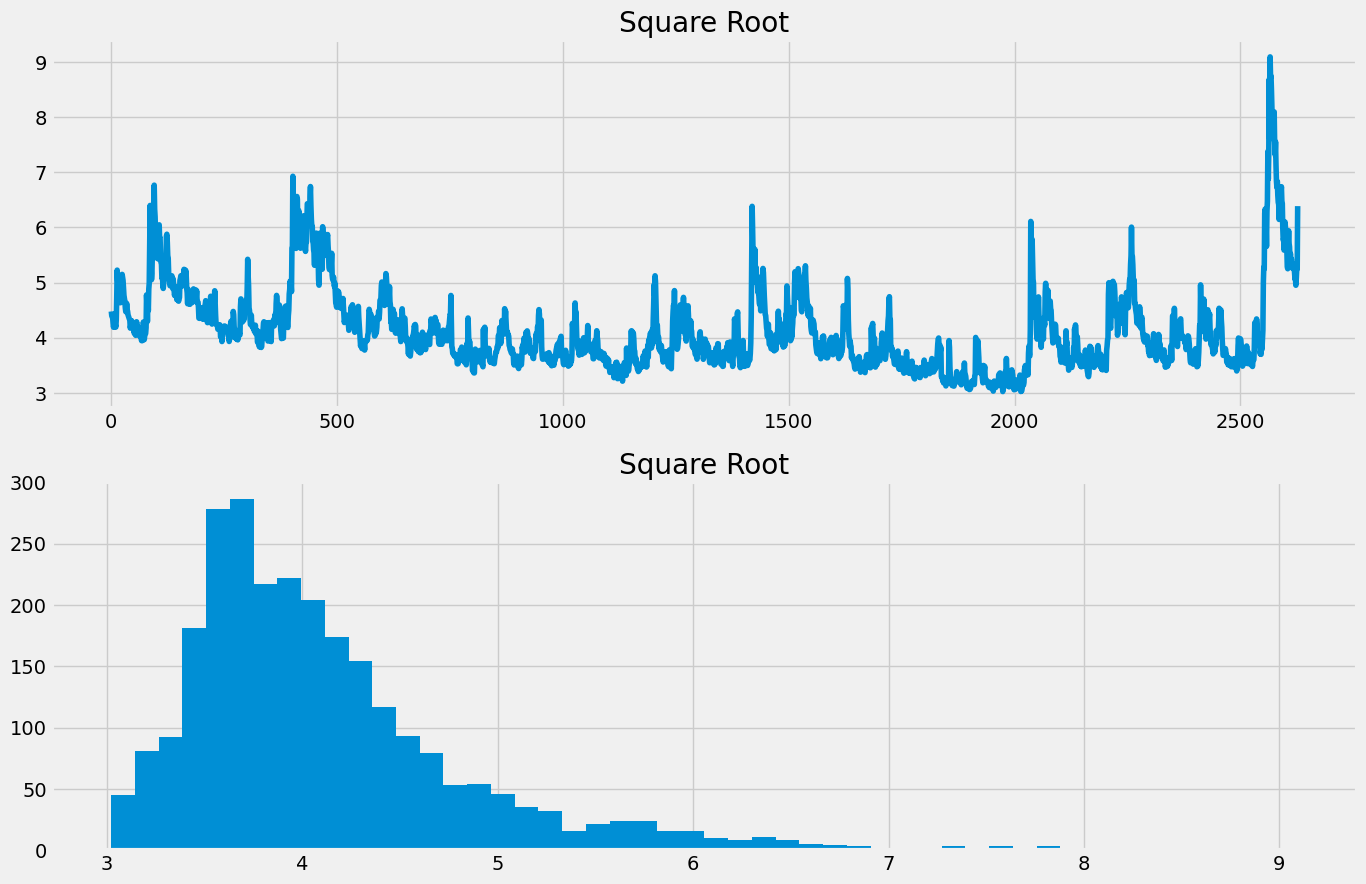

In [168]:
plt.figure(figsize = (15,10)) 
# line plot 
plt.subplot(211)
plt.title("Square Root")
plt.plot(dataframe['CLOSE']) 
# histogram 
plt.subplot(212)
plt.title("Square Root")
plt.hist(dataframe['CLOSE'],bins=50) 
plt.show()

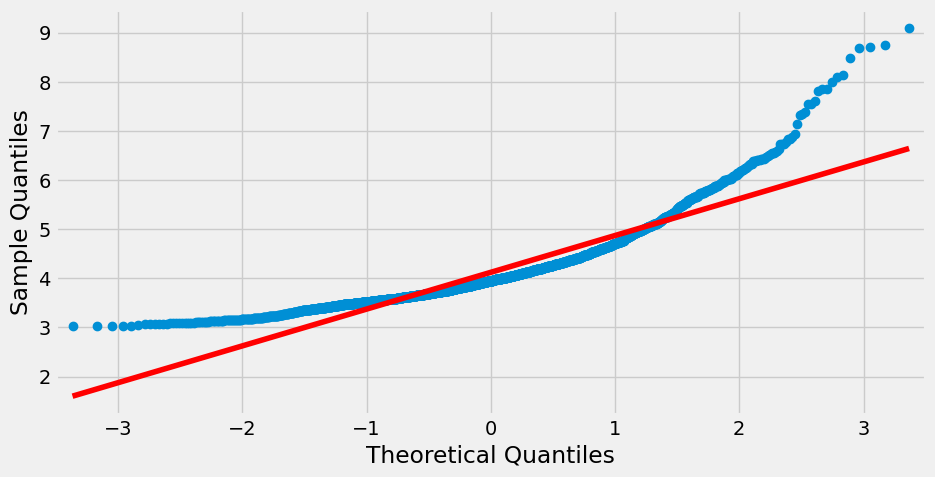

In [169]:
#See if it is normally distributed 
qqplot(dataframe['CLOSE'], line='s')
plt.show()

**Log**

In [170]:
dataframe = pd.DataFrame(df['CLOSE'].values) 
dataframe.columns = ['CLOSE'] 
dataframe['CLOSE'] = np.log(dataframe['CLOSE']) 

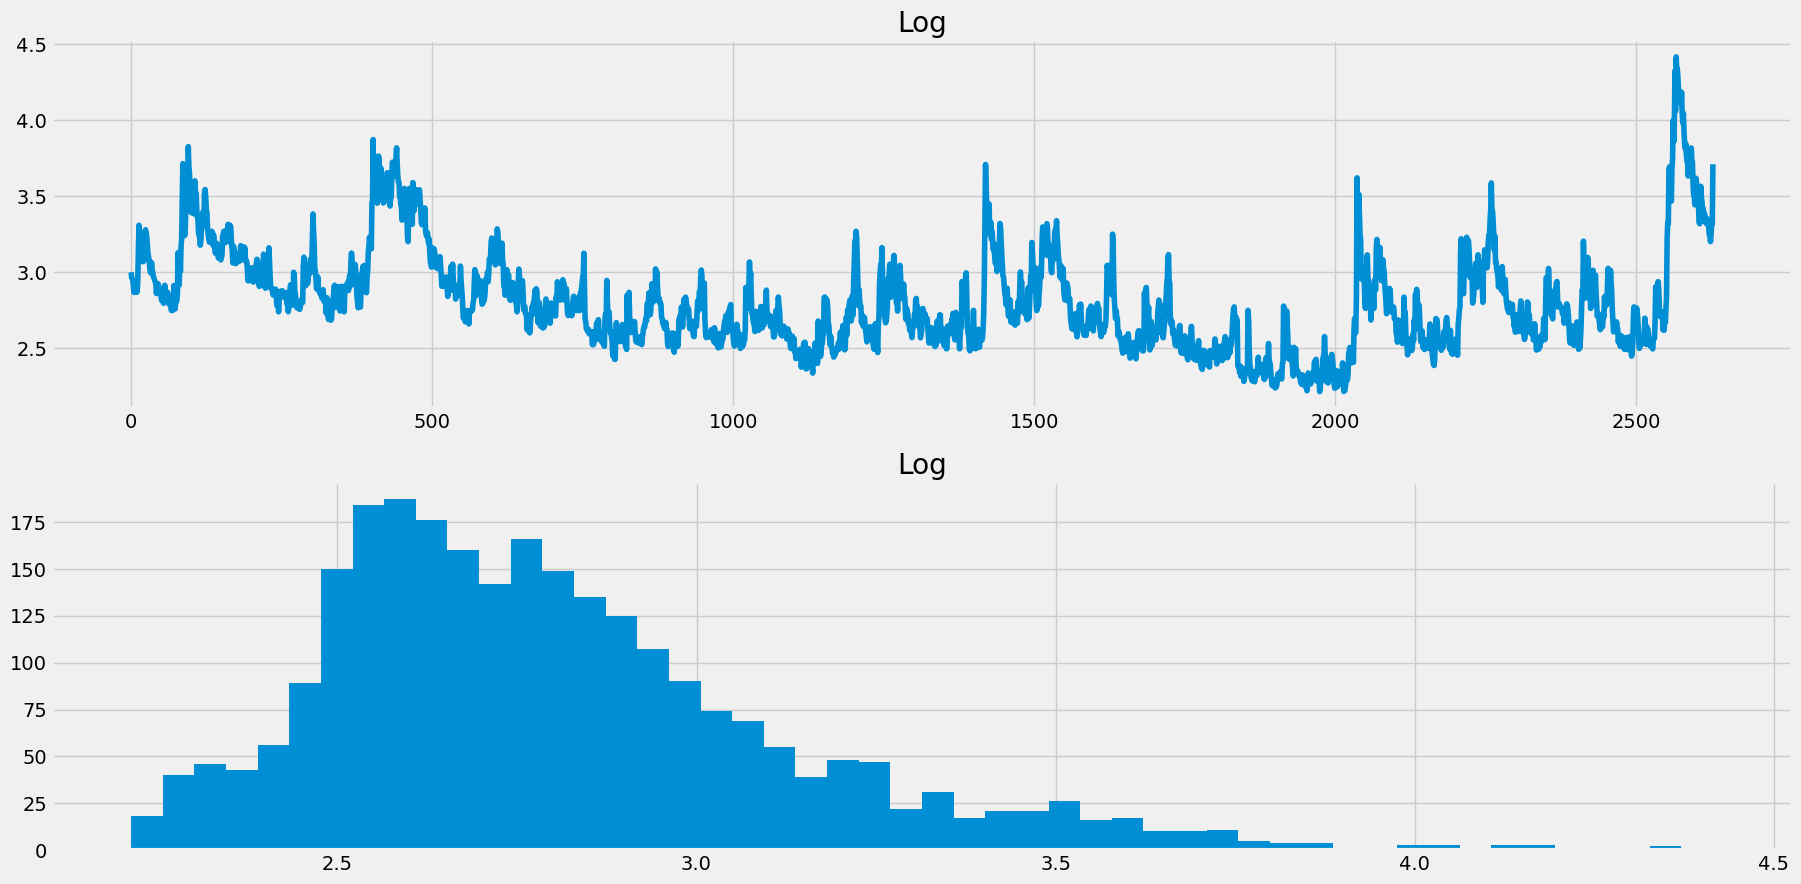

In [171]:
plt.figure(figsize = (20,10)) 
# line plot 
plt.subplot(211)
plt.title("Log")
plt.plot(dataframe['CLOSE']) 
# histogram 
plt.subplot(212) 
plt.title("Log")
plt.hist(dataframe['CLOSE'], bins=50) 
plt.show()

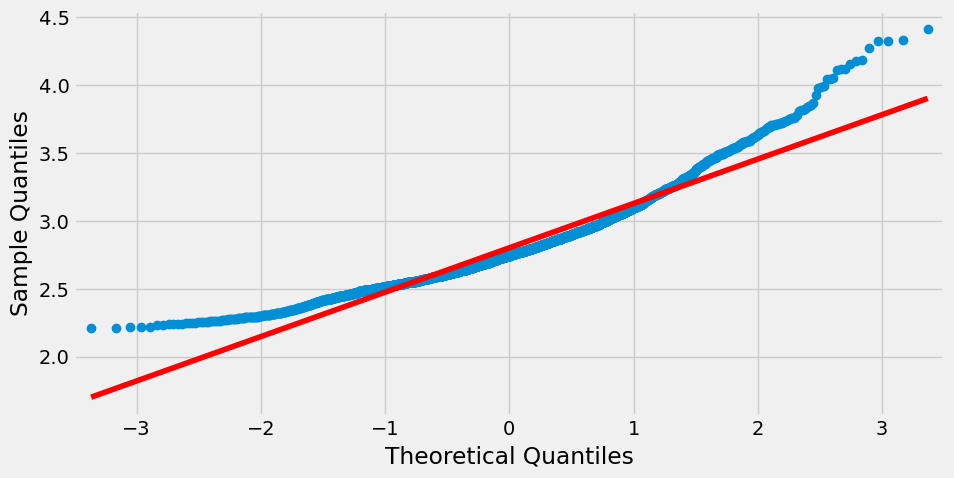

In [172]:
#See if it is normally distributed 
qqplot(dataframe['CLOSE'], line='s')
plt.show()

**Box Cox**

In [173]:
dataframe = pd.DataFrame(df['CLOSE'].values) 
dataframe.columns = ['CLOSE'] 
dataframe['CLOSE'], lam = boxcox(dataframe['CLOSE']) 
print('Lambda: %f' % lam) 

Lambda: -1.122318


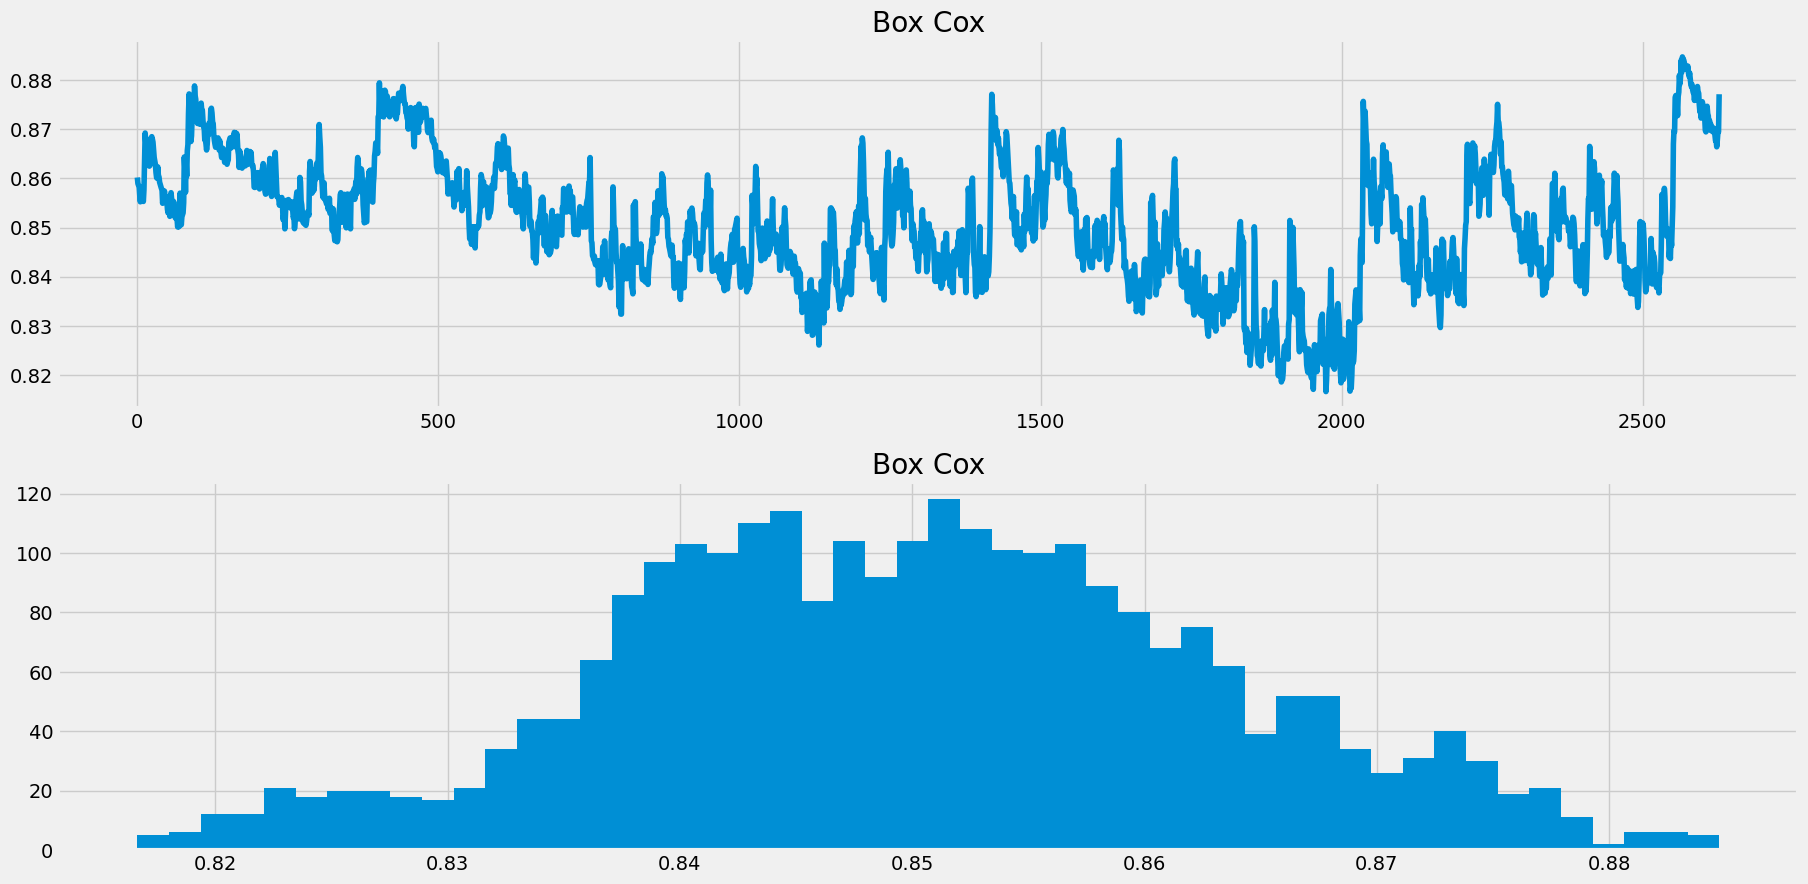

In [174]:
plt.figure(figsize = (20,10)) 
# line plot 
plt.subplot(211)
plt.title("Box Cox")
plt.plot(dataframe['CLOSE']) 
# histogram 
plt.subplot(212) 
plt.title("Box Cox")
plt.hist(dataframe['CLOSE'], bins=50) 
plt.show()

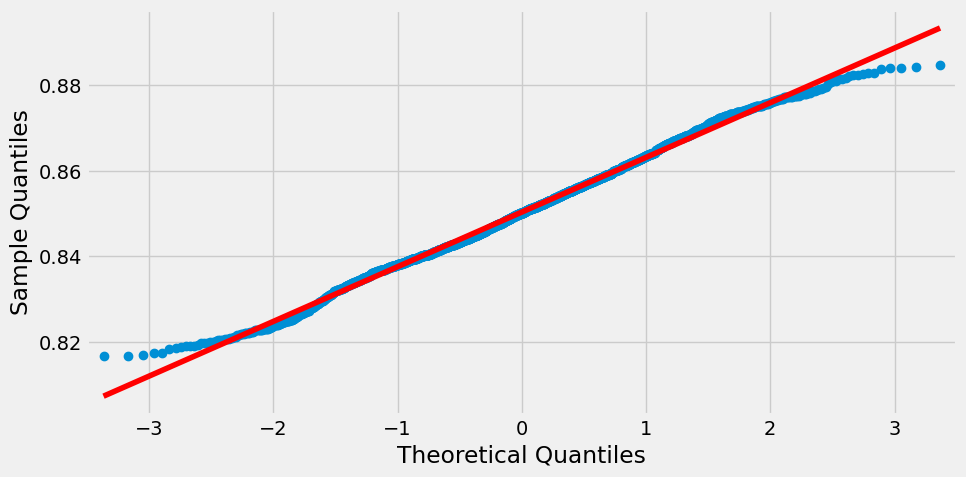

In [175]:
#See if it is normally distributed 
qqplot(dataframe['CLOSE'], line='s')
plt.show()

In [176]:
# statistical test  Null hypothesis is that the series is non-stationary
result = adfuller(dataframe['CLOSE']) 
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 
print('Critical Values:') 

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.356759
p-value: 0.000354
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


Based on the results of the AdFuller Test, the null hypothesis of non-stationarity can be rejected in favor of the alternate hypothesis that the series is stationary.

Since the time series is stationary look at the seasonal decomposition (both additive and multiplicative).

In [129]:
type(df['CLOSE'])

pandas.core.series.Series

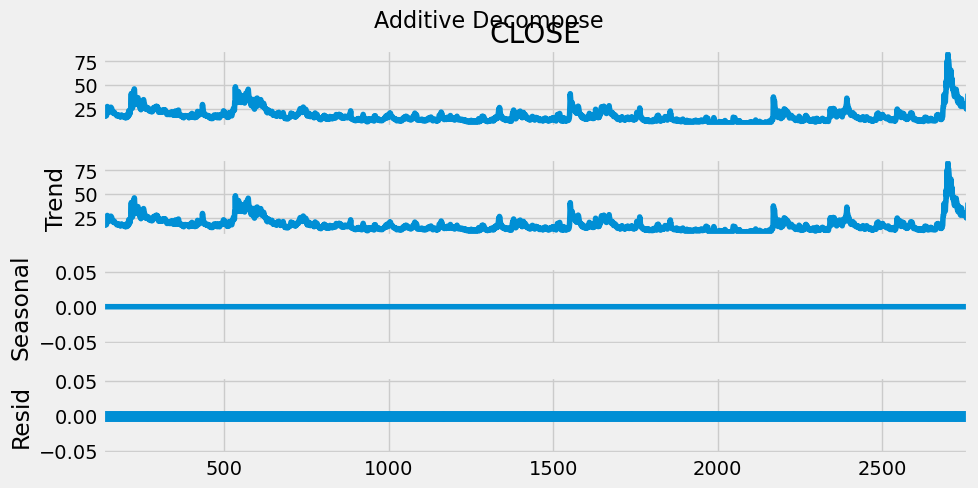

In [132]:
result_add = seasonal_decompose(x=df['CLOSE'], model='additive', extrapolate_trend='freq', period=1)
plt.rcParams.update({'figure.figsize': (10,5)})
result_add.plot().suptitle('Additive Decompose', fontsize=16)
plt.show()

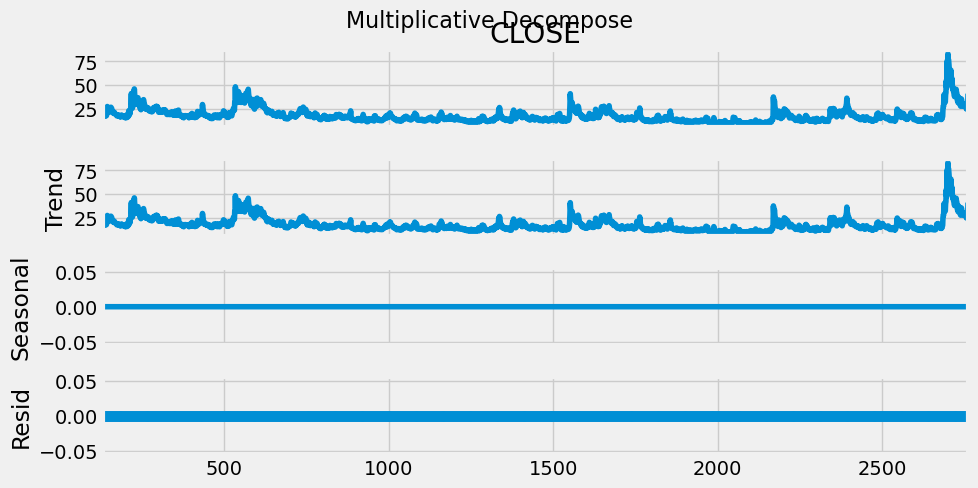

In [133]:
result_mult = seasonal_decompose(x=df['CLOSE'], model='multiplicative', extrapolate_trend='freq', period=int(len(df['CLOSE'])/7))
plt.rcParams.update({'figure.figsize': (10,5)})
result_add.plot().suptitle('Multiplicative Decompose', fontsize=16)
plt.show()

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2628 entries, 133 to 2760
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CLOSE              2628 non-null   float64
 1   Positive           2628 non-null   int64  
 2   Negative           2628 non-null   int64  
 3   Neutral            2628 non-null   int64  
 4   Total              2628 non-null   int64  
 5   summed_vader       2628 non-null   float64
 6   sentiments         2628 non-null   object 
 7   headlines          2628 non-null   object 
 8   stocks             2628 non-null   object 
 9   date               2628 non-null   object 
 10  dayOfWeek          2628 non-null   object 
 11  ave_vader          2628 non-null   float64
 12  daily_sentiment    2628 non-null   object 
 13  compound           2628 non-null   float64
 14  overall_sentiment  2628 non-null   object 
 15  Pos_minus_Neg      2628 non-null   int64  
 16  Pos_minus_Neg_pct  2628 non

Add `target` which is the next day's CLOSE and `direction` which is the directional signal for the next day 0 if the VIX went down the next day and 1 if the VIX went up the next day.

In [135]:
df['target'] = df.CLOSE.shift(-1)
df.loc[:,'direction'] = [0 if d1>=d2 else 1 for d1,d2 in zip(df.CLOSE,df.target)]
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2627 entries, 133 to 2759
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CLOSE              2627 non-null   float64
 1   Positive           2627 non-null   int64  
 2   Negative           2627 non-null   int64  
 3   Neutral            2627 non-null   int64  
 4   Total              2627 non-null   int64  
 5   summed_vader       2627 non-null   float64
 6   sentiments         2627 non-null   object 
 7   headlines          2627 non-null   object 
 8   stocks             2627 non-null   object 
 9   date               2627 non-null   object 
 10  dayOfWeek          2627 non-null   object 
 11  ave_vader          2627 non-null   float64
 12  daily_sentiment    2627 non-null   object 
 13  compound           2627 non-null   float64
 14  overall_sentiment  2627 non-null   object 
 15  Pos_minus_Neg      2627 non-null   int64  
 16  Pos_minus_Neg_pct  2627 non

In [136]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [137]:
categorical_col = ['sentiments','overall_sentiment','dayOfWeek', 'daily_sentiment']
numerical_col = ['Positive',
              'Negative', 'Neutral', 'Total','summed_vader','ave_vader','compound', 'Pos_minus_Neg', 'Pos_minus_Neg_pct', 'Neg_pct']

In [138]:
# pick transformers
numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler())
])
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numerical_col)
   ,('categorical', categorical_transformer, categorical_col)
]) 

In [139]:
# Split the data for predicting 'target'
data = df.drop(['direction', 'CLOSE'] ,axis=1) ## obviously ClOSE must be dropped to prevent leakage



In [140]:

# split into train and test sets
size = int(len(data) * 0.9)
train, test = data[0:size], data[size:len(X)]
y_train, y_test = train['target'], test['target']
X_train , X_test = train.drop('target', axis=1), test.drop('target', axis=1)
history =  X_train
predictions = list()

In [141]:
X = data.drop('target', axis=1)
X.shape              

(2627, 17)

In [142]:
RMSE = list()
for sequence in range(size, data.index.max() + 1):
        train = data[data.index < sequence]
        test = data[data.index == sequence]
        X_train, X_test = train.drop(['target'], axis=1), test.drop(['target'], axis=1)
        y_train, y_test = train['target'].values, test['target'].values
    
        pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',LinearRegression())
           ])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test) 
        error = mean_squared_error(test['target'].values, y_pred)
        RMSE.append(error)
print('Mean RMSE = %.5f' % np.mean(RMSE))

Mean RMSE = 120.81250


In [107]:
y_test

array([27.57])

In [108]:

# walk-forward validation
for t in range(len(test)):
    model = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',LinearRegression())
           ])
    model_fit = model.fit(history, y_train)
    output = model_fit.predict(X_test)
    yhat = output[t]
    predictions.append(yhat)
    obs = X_test[t:t+1]
    history = pd.concat([history,obs])
    y_train = pd.concat([y_train, pd.Series(yhat)])
    print("Predicted: ", yhat, "  Observed:  ", y_test[t:t+1].values)
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(X_test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red', alpha=.3)
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [2362, 2624]

In [ ]:
history.shape, y_train.shape

In [ ]:
y_train.info()


In [ ]:
pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',LinearRegression())
           ])
lr_model = pipeline.fit(X_train, y_train) 
predictions = lr_model.predict(X_test)

In [ ]:
print(lr_model.score(X_test,y_test))
print(lr_model[:-1].get_feature_names_out())
X_tran = preprocessor.fit_transform(X)

In [ ]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
regression_results(y_test, predictions)

In [ ]:
X_tran = pd.DataFrame(X_tran)
X_tran.head()

In [ ]:

numeric = pd.DataFrame(df[numerical_col])
numeric['target']=df['target']
plt.subplots(figsize=(12,10))
sns.heatmap(numeric.corr());

In [ ]:
numeric.corr()

Most notable is that the positive and neutral counts do not appear to have much relationship to the target while the negative count has the strongest correlation to the target. 

In [ ]:
len(predictions)

In [ ]:
# plot forecasts against actual outcomes
plt.plot(y_test)
plt.plot(predictions, color='red', alpha=.3)
plt.show()

In [ ]:
# The coefficients
print("Coefficients: \n", lr_model['regressor'].coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, predictions))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, predictions))

# # Plot outputs
# plt.scatter(X_test, y_test, color="black")
# plt.plot(X_test, predictions, color="blue", linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()

While the linear regression model genertes some results the mse is high and implies an error in prediction of the VIX of around 7 which is huge considering the index is rarely above 25. Similarly, there is massive room for improvement with R<sup>2</sup> of 20%